#### Data Load & Preparation

In [21]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
# Loading the sports activity dataset
url = 'https://raw.githubusercontent.com/Redback-Operations/redback-fit-sports-performance/main/Cycling%20Analysis/data/extended_activities.csv'
# Read the CSV file directly from the URL
df = pd.read_csv(url)

# Displaying the first 5 rows
df.head(5)

,Activity ID,Activity Date,Activity Name,Activity Type,Elapsed Time,Distance,Max Heart Rate,Relative Effort,Commute,Activity Gear,...,Maximum Power 10s,Maximum Power 30s,Maximum Power 1.0min,Maximum Power 5.0min,Maximum Power 10.0min,Maximum Power 20.0min,Maximum Power 30.0min,Maximum Power 1.0 hr,Maximum Power 1.5 hr,Maximum Power 2.0 hr
0,2929442069,"13 Dec 2019, 01:46:07",Lunch Ride,Ride,3859,22.97,139.0,11.0,False,NaN,...,412.9,342.1,221.2,162.2,136.3,120.8,109.8,105.4,0.0,0.0
1,2945780637,"20 Dec 2019, 23:05:01",Morning Ride,Ride,4852,29.65,133.0,12.0,False,NaN,...,342.1,236.1,184.3,150.6,131.4,122.1,120.3,115.6,0.0,0.0
2,2948028275,"21 Dec 2019, 23:25:29",Morning Ride,Ride,5817,32.38,139.0,19.0,False,NaN,...,390.5,265.1,213.3,146.2,135.1,127.5,125.5,110.2,104.7,0.0
3,2952462113,"24 Dec 2019, 01:19:17",Lunch Ride,Ride,3851,21.68,140.0,11.0,False,NaN,...,452.0,303.1,262.0,161.9,146.7,139.7,134.0,112.3,0.0,0.0
4,2956494096,"26 Dec 2019, 00:09:08",Lunch Ride,Ride,5843,32.36,131.0,14.0,False,NaN,...,342.9,243.9,208.3,134.7,124.0,119.4,115.5,99.8,96.9,0.0


In [25]:
# Converting the Activity Date column to date format
df["Activity Date"] = pd.to_datetime(df["Activity Date"])

# Sort data ascending by Activity Date
df.sort_values(by=['Activity Date'])

# Changing date to string format for visualisation
df["Activity Date"] = df["Activity Date"].dt.strftime("%d-%m-%Y")

In [26]:
# Isolating the running data component
df_run = df[df['Activity Type'] == 'Run']

In [27]:
df_run.head(5)

,Activity ID,Activity Date,Activity Name,Activity Type,Elapsed Time,Distance,Max Heart Rate,Relative Effort,Commute,Activity Gear,...,Maximum Power 10s,Maximum Power 30s,Maximum Power 1.0min,Maximum Power 5.0min,Maximum Power 10.0min,Maximum Power 20.0min,Maximum Power 30.0min,Maximum Power 1.0 hr,Maximum Power 1.5 hr,Maximum Power 2.0 hr
89,7057073739,28-04-2022,Morning Run,Run,4127,12.77,178.0,78.0,False,NaN,...,296.8,271.9,259.4,247.5,242.9,241.5,239.5,235.6,0.0,0.0
90,7067754767,01-05-2022,Morning Run,Run,7723,24.63,173.0,185.0,False,NaN,...,376.5,343.7,326.4,316.3,315.0,297.3,291.1,280.1,275.8,272.1
91,7073448977,01-05-2022,Morning Run,Run,4202,12.51,182.0,255.0,False,NaN,...,342.0,300.0,282.7,267.1,262.4,261.1,258.3,253.2,0.0,0.0
92,7083686840,03-05-2022,Morning Run,Run,4086,12.72,188.0,276.0,False,NaN,...,326.0,302.3,287.4,275.5,270.9,269.0,267.2,263.4,0.0,0.0
93,7094718079,05-05-2022,Morning Run,Run,4290,13.09,184.0,241.0,False,NaN,...,320.9,315.3,306.2,271.2,269.9,263.9,264.2,258.8,0.0,0.0


In [28]:
# Describing data 
df_run.describe()

,Activity ID,Elapsed Time,Distance,Max Heart Rate,Relative Effort,Athlete Weight,Bike Weight,Moving Time,Max Speed,Average Speed,...,Maximum Power 10s,Maximum Power 30s,Maximum Power 1.0min,Maximum Power 5.0min,Maximum Power 10.0min,Maximum Power 20.0min,Maximum Power 30.0min,Maximum Power 1.0 hr,Maximum Power 1.5 hr,Maximum Power 2.0 hr
count,1.640000e+02,164.000000,164.000000,164.000000,164.000000,0.0,0.0,164.000000,164.000000,164.000000,...,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000
mean,8.211358e+09,4390.871951,12.584268,178.237805,152.810976,NaN,NaN,4211.518293,6.247638,2.981124,...,330.110366,299.445122,283.110366,264.346341,259.372561,254.860976,250.423780,144.715244,57.718293,24.101220
std,7.392044e+08,2052.552196,5.369254,10.528875,106.591449,NaN,NaN,1771.775123,6.017020,0.135569,...,44.215151,25.384166,21.508408,18.551373,17.484031,16.428535,25.328194,125.679284,105.583782,73.598314
min,7.057074e+09,1506.000000,4.060000,140.000000,6.000000,NaN,NaN,1506.000000,3.233984,2.696547,...,253.500000,248.100000,240.700000,234.900000,232.600000,229.300000,0.000000,0.000000,0.000000,0.000000
25%,7.759300e+09,3015.500000,8.475000,174.750000,68.750000,NaN,NaN,2987.750000,3.994507,2.895473,...,298.200000,281.025000,268.250000,251.450000,247.875000,243.450000,241.350000,0.000000,0.000000,0.000000
50%,8.146922e+09,4016.500000,12.000000,178.000000,130.500000,NaN,NaN,3875.500000,4.400000,2.980313,...,322.250000,297.950000,280.450000,262.600000,257.500000,252.000000,249.700000,236.400000,0.000000,0.000000
75%,8.611014e+09,5236.250000,15.362500,184.000000,225.500000,NaN,NaN,4976.250000,5.200000,3.057861,...,351.100000,317.550000,294.725000,271.300000,265.700000,262.750000,259.650000,254.050000,0.000000,0.000000
max,1.027158e+10,16615.000000,28.870000,210.000000,528.000000,NaN,NaN,9936.000000,45.083332,3.596129,...,477.400000,367.600000,342.800000,323.300000,319.300000,315.700000,301.500000,289.800000,287.600000,272.100000


In [29]:
print("Size:", df_run.size)
print("Shape:", df_run.shape)
print("==============================")
print("Dataset information:")
print(df_run.info())

Size: 8036
Shape: (164, 49)
Dataset information:
<class 'pandas.core.frame.DataFrame'>
Index: 164 entries, 89 to 344
Data columns (total 49 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Activity ID                164 non-null    int64  
 1   Activity Date              164 non-null    object 
 2   Activity Name              164 non-null    object 
 3   Activity Type              164 non-null    object 
 4   Elapsed Time               164 non-null    int64  
 5   Distance                   164 non-null    float64
 6   Max Heart Rate             164 non-null    float64
 7   Relative Effort            164 non-null    float64
 8   Commute                    164 non-null    bool   
 9   Activity Gear              0 non-null      object 
 10  Filename                   164 non-null    object 
 11  Athlete Weight             0 non-null      float64
 12  Bike Weight                0 non-null      float64
 13  Movin

In [30]:
# Sum the total rows of missing values from each attribute
missing_values = df_run.isnull().sum()
missing_values

Activity ID                    0
Activity Date                  0
Activity Name                  0
Activity Type                  0
Elapsed Time                   0
Distance                       0
Max Heart Rate                 0
Relative Effort                0
Commute                        0
Activity Gear                164
Filename                       0
Athlete Weight               164
Bike Weight                  164
Moving Time                    0
Max Speed                      0
Average Speed                  0
Elevation Gain                 0
Elevation Loss                 1
Elevation Low                  1
Elevation High                 1
Max Grade                      0
Average Grade                  0
Max Cadence                    0
Average Cadence                0
Average Heart Rate             0
Average Watts                  0
Calories                       0
Average Temperature          155
Total Work                   147
Perceived Exertion           164
Weighted A

In [31]:
# Filtering data for last 30 sessions
df_run30 = df_run.tail(30)
# Checking data
df_run30.shape

(30, 49)

#### Time series analysis

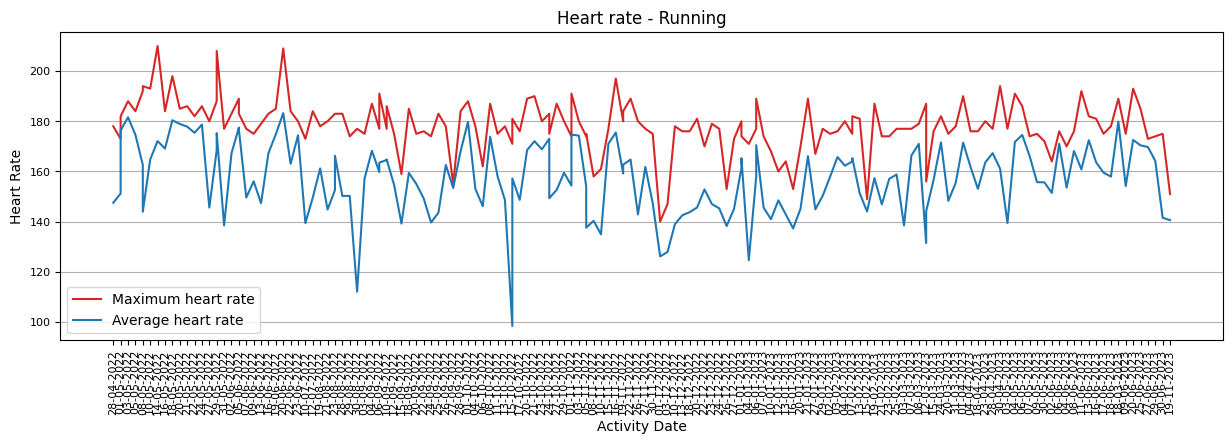

In [32]:
# Plotting data for Heart Rate analysis
def plot_run_all_hr(d, x, y, z, title="", xlabel='Activity Date', ylabel='Heart Rate', dpi=100):
    plt.figure(figsize=(15,4), dpi=dpi)
    plt.xticks(rotation = 90)
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.plot(x, z, color='tab:red', label='Maximum heart rate')
    plt.plot(x, y, color='tab:blue',  label='Average heart rate')
    plt.grid(axis='y')
    plt.legend(loc='lower left')
    plt.show()
    
plot_run_all_hr(d=df_run, x=df_run['Activity Date'], y=df_run['Average Heart Rate'], z=df_run['Max Heart Rate'], title='Heart rate - Running')

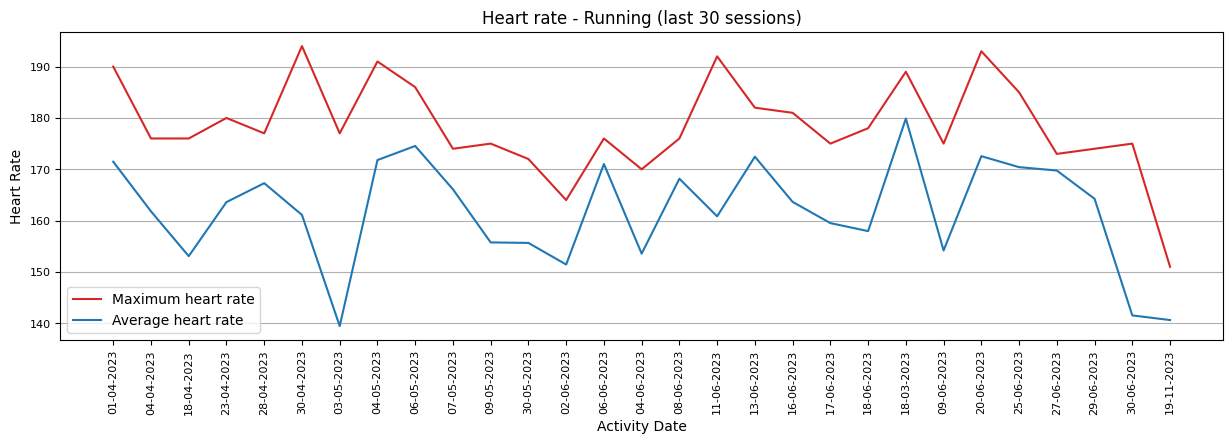

In [33]:
# Plotting data for Heart Rate analysis, last 30 sessions
def plot_run_30_hr(d, x, y, z, title="", xlabel='Activity Date', ylabel='Heart Rate', dpi=100):
    plt.figure(figsize=(15,4), dpi=dpi)
    plt.xticks(rotation = 90)
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.plot(x, z, color='tab:red', label='Maximum heart rate')
    plt.plot(x, y, color='tab:blue',  label='Average heart rate')
    plt.grid(axis='y')
    plt.legend(loc='lower left')
    plt.show()
    
plot_run_30_hr(d=df_run30, x=df_run30['Activity Date'], y=df_run30['Average Heart Rate'], z=df_run30['Max Heart Rate'], title='Heart rate - Running (last 30 sessions)')

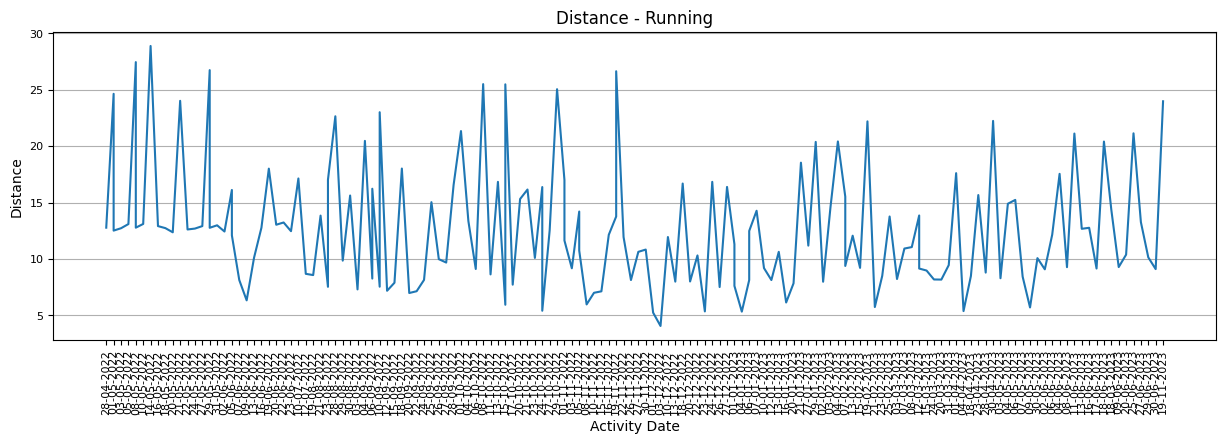

In [34]:
# Plotting data for Distance analysis
def plot_run_all_dis(d, x, y, title="", xlabel='Activity Date', ylabel='Distance', dpi=100):
    plt.figure(figsize=(15,4), dpi=dpi)
    plt.plot(x, y, color='tab:blue')
    plt.xticks(rotation = 90)
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.grid(axis='y')
    plt.show()
    
plot_run_all_dis(d= df_run, x=df_run['Activity Date'], y=df_run['Distance'], title='Distance - Running')

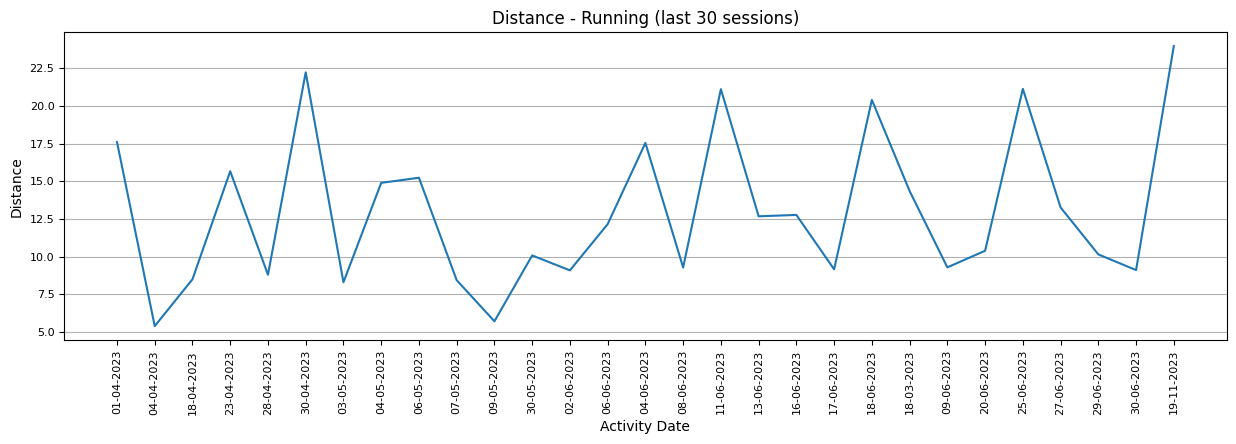

In [35]:
# Plotting data for Distance analysis, last 30 sessions
def plot_run_30_dis(d, x, y, title="", xlabel='Activity Date', ylabel='Distance', dpi=100):
    plt.figure(figsize=(15,4), dpi=dpi)
    plt.plot(x, y, color='tab:blue')
    plt.xticks(rotation = 90)
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.grid(axis='y')
    plt.show()
    
plot_run_30_dis(d= df_run30, x=df_run30['Activity Date'], y=df_run30['Distance'], title='Distance - Running (last 30 sessions)')


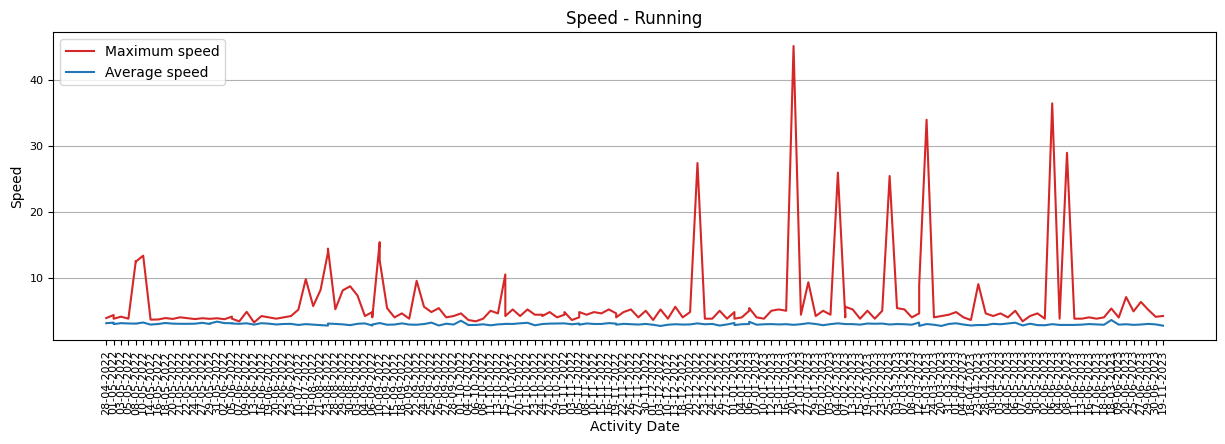

In [36]:
# Plotting data for Speed analysis
def plot_run_all_spd(d, x, y, z, title="", xlabel='Activity Date', ylabel='Speed', dpi=100):
    plt.figure(figsize=(15,4), dpi=dpi)
    plt.xticks(rotation = 90)
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.plot(x, z, color='tab:red', label='Maximum speed')
    plt.plot(x, y, color='tab:blue',  label='Average speed')
    plt.legend(loc='upper left')
    plt.grid(axis='y')
    plt.show()
    
plot_run_all_spd(d=df_run, x=df_run['Activity Date'], y=df_run['Average Speed'], z=df_run['Max Speed'], title='Speed - Running')

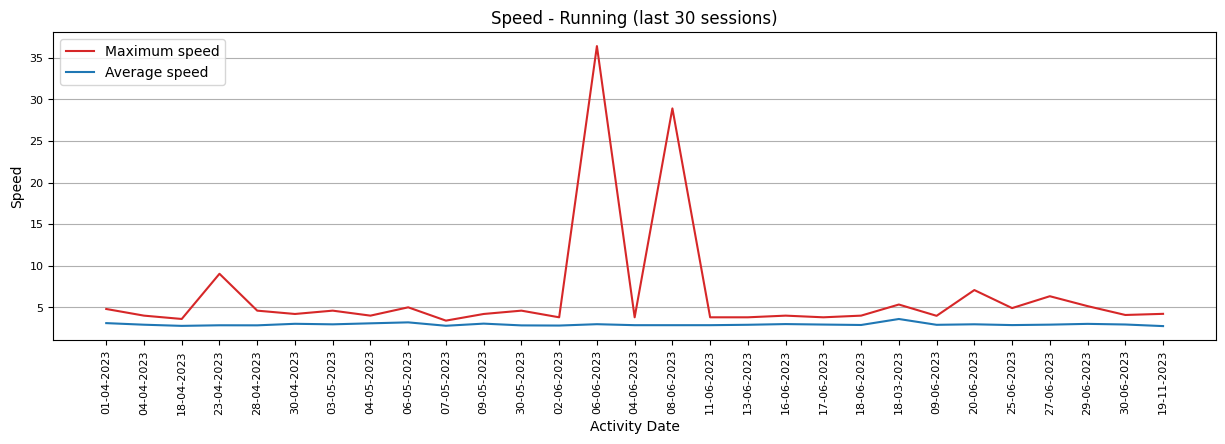

In [37]:
# Plotting data for Speed analysis,last 30 sessions
def plot_run_30_spd(d, x, y, z, title="", xlabel='Activity Date', ylabel='Speed', dpi=100):
    plt.figure(figsize=(15,4), dpi=dpi)
    plt.xticks(rotation = 90)
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.plot(x, z, color='tab:red', label='Maximum speed')
    plt.plot(x, y, color='tab:blue',  label='Average speed')
    plt.legend(loc='upper left')
    plt.grid(axis='y')    
    plt.show()
    
plot_run_30_spd(d=df_run30, x=df_run30['Activity Date'], y=df_run30['Average Speed'], z=df_run30['Max Speed'], title='Speed - Running (last 30 sessions)')

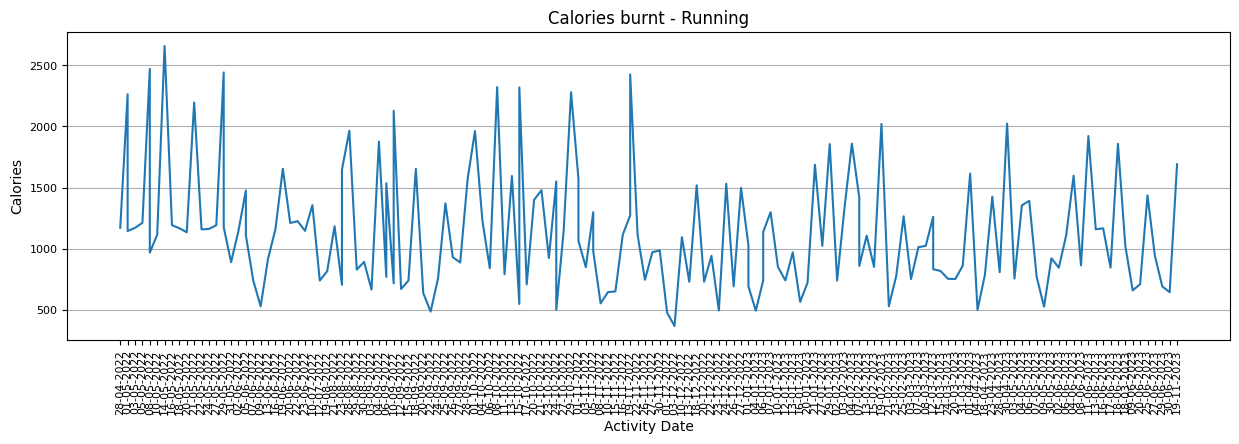

In [38]:
# Plotting data for Calories burnt analysis
def plot_run_all_cal(d, x, y, title="", xlabel='Activity Date', ylabel='Calories', dpi=100):
    plt.figure(figsize=(15,4), dpi=dpi)
    plt.xticks(rotation = 90)
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.plot(x, y, color='tab:blue',  label='Calories')
    plt.grid(axis='y')
    plt.show()
    
plot_run_all_cal(d=df_run, x=df_run['Activity Date'], y=df_run['Calories'], title='Calories burnt - Running')

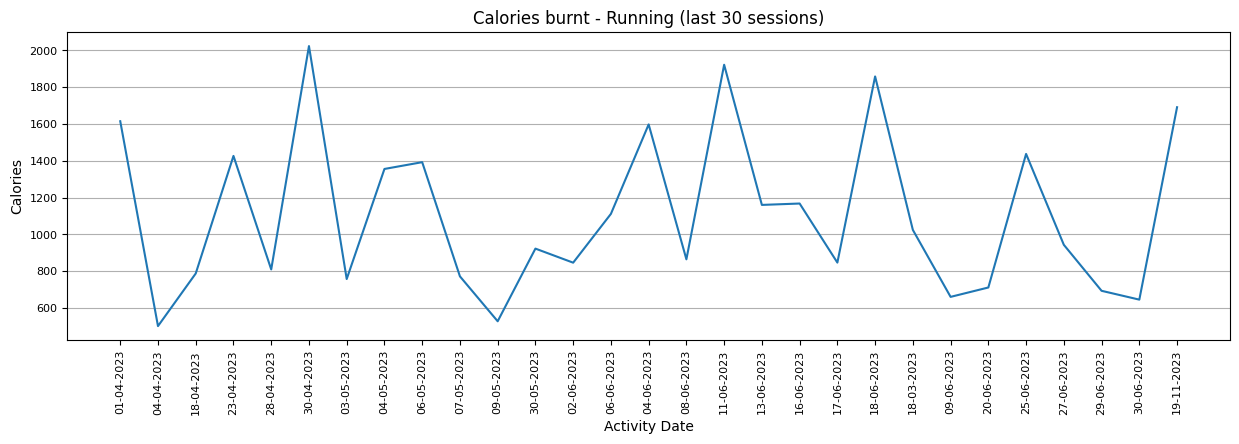

In [39]:
# Plotting data for Calories burnt analysis, last 30 sessions
def plot_run_30_cal(d, x, y, title="", xlabel='Activity Date', ylabel='Calories', dpi=100):
    plt.figure(figsize=(15,4), dpi=dpi)
    plt.xticks(rotation = 90)
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.plot(x, y, color='tab:blue',  label='Calories')
    plt.grid(axis='y')
    plt.show()
    
plot_run_30_cal(d=df_run30, x=df_run30['Activity Date'], y=df_run30['Calories'], title='Calories burnt - Running (last 30 sessions)')

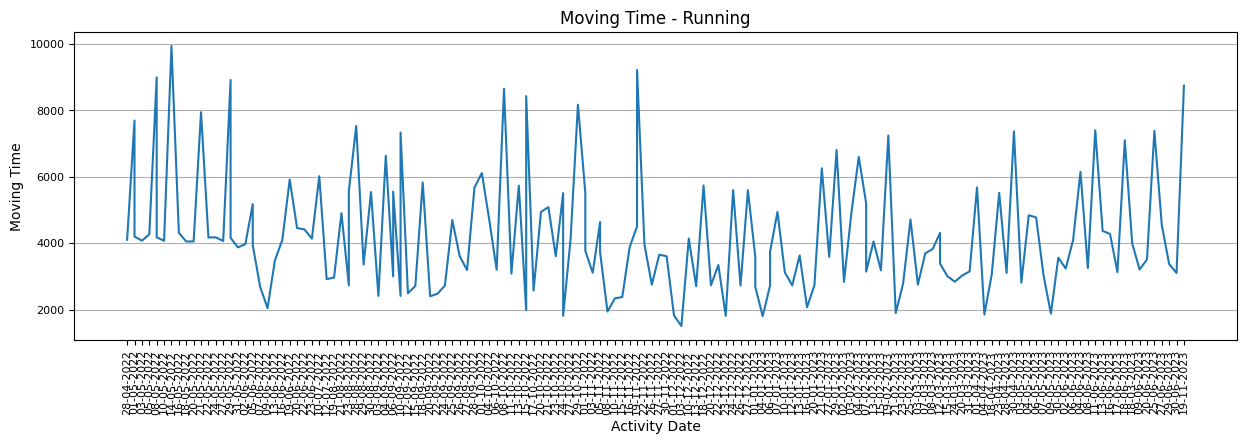

In [40]:
# Plotting data for Moving time analysis
def plot_run_all_mvt(d, x, y, title="", xlabel='Activity Date', ylabel='Moving Time', dpi=100):
    plt.figure(figsize=(15,4), dpi=dpi)
    plt.xticks(rotation = 90)
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.plot(x, y, color='tab:blue',  label='Moving Time')
    plt.grid(axis="y")
    plt.show()
    
plot_run_all_mvt(d=df_run, x=df_run['Activity Date'], y=df_run['Moving Time'], title='Moving Time - Running')

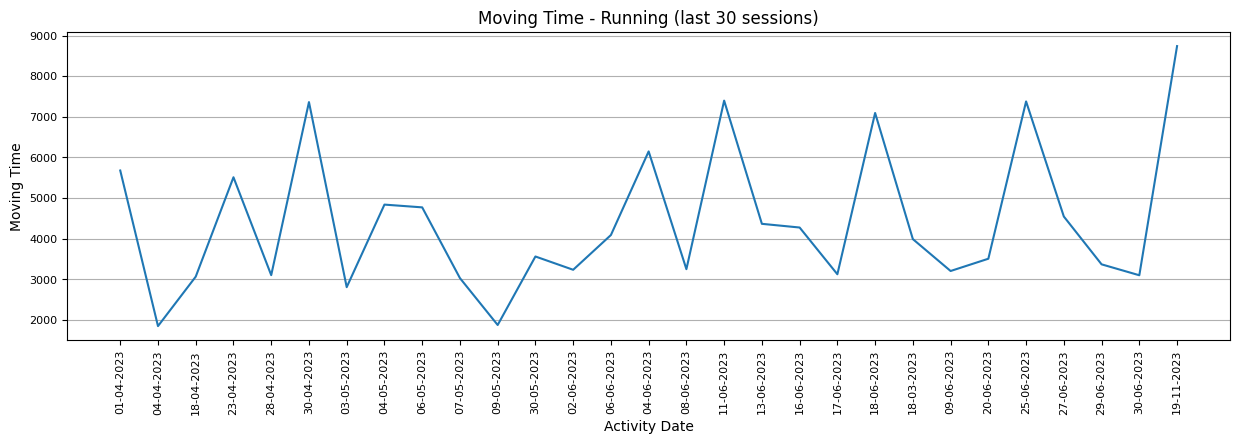

In [41]:
# Plotting data for Moving time analysis, last 30 sessions
def plot_run_30_mvt(d, x, y, title="", xlabel='Activity Date', ylabel='Moving Time', dpi=100):
    plt.figure(figsize=(15,4), dpi=dpi)
    plt.xticks(rotation = 90)
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.plot(x, y, color='tab:blue',  label='Moving Time')
    plt.grid(axis="y")
    plt.show()
    
plot_run_30_mvt(d=df_run30, x=df_run30['Activity Date'], y=df_run30['Moving Time'], title='Moving Time - Running (last 30 sessions)')